## Marketing campaigns banking institution

In this dataset we using Logistic regression which is machine learning classification algorithim that is used to predicti the probability of the categorical dependent variable 'y' variable, In logistic regression, the dependent variable is Y and the data in the form of a binary variable that contains values as 1 or 0 ( yes, ture or No, False).

In [1]:
# Importing the libraries

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Importing the dataset

os.chdir(r'D:\for github\data\New folder\LoR_Case_1.1')
os.getcwd()
data_org = pd.read_csv('Banking.csv')
#data_org.head()
data = data_org
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


####  The classification goal is to predict whether the client will subscribe or unsubscribe (1/0) to a term deposit (variable y).

### Cheacking the deatils of the data

This method gives us a Introduction about the Data, like- rangeIndex, no. of rows, no. of columns, data types of column entries (integer, object, etc).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
# check Value counts for Y
data['y'].value_counts()    #y - has the client subscribed a term deposit? (binary: 'yes','no')

0    36548
1     4640
Name: y, dtype: int64

#### From the above output we can conclude that classes are imbalanced because there are high diffrences we can see between subscribe or no-subscribe, so let’s find some more clues by doing more explorations.

In [5]:
data.isnull().sum() #gives the number of missing values for each variable

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Visualizations

we the help of visualizations we are try to finding out some more insights.

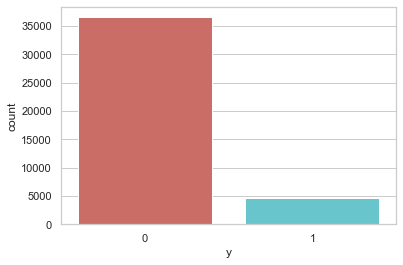

0.8873458288821987

In [6]:
#Barplot for the dependent variable
sns.countplot(x='y',data=data, palette='hls')
plt.show()
len(data[data['y']==1])/len(data)
len(data[data['y']==0])/len(data)

In the above output we can clearly seen here, classes are imbalanced because there are high diffrences and ratio is 89%-11% for the subscribe( 1 ) or no-subscribe( 0 ) datavalues, so let’s do some more explorations.

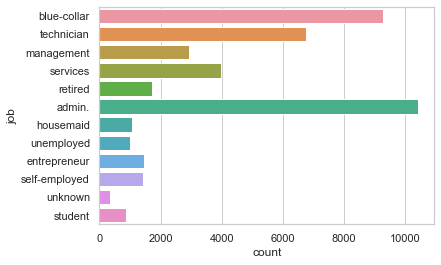

In [7]:
#Customer job distribution
sns.countplot(y="job", data=data)
plt.show()

From the Job distribution, we can assume the job title can be a good predictor for the outcome variable.

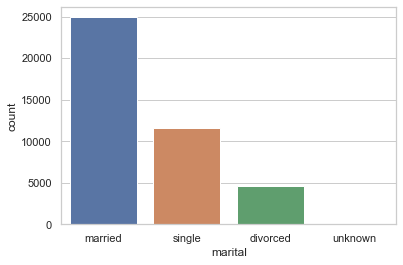

In [8]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

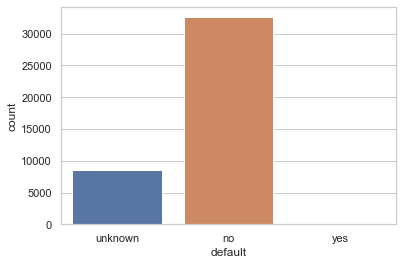

In [9]:
#Barplot for credit in default
sns.countplot(x="default", data=data)
plt.show()

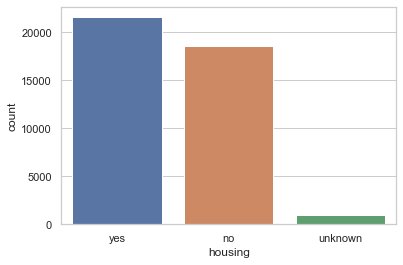

In [10]:
#Barplot for housing loan
sns.countplot(x="housing", data=data)
plt.show()

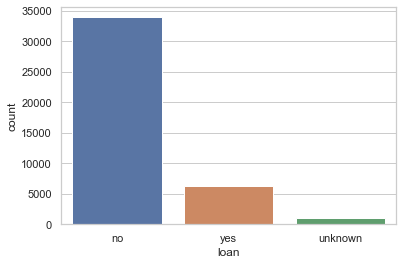

In [11]:
#Barplot for personal loan
sns.countplot(x="loan", data=data)
plt.show()

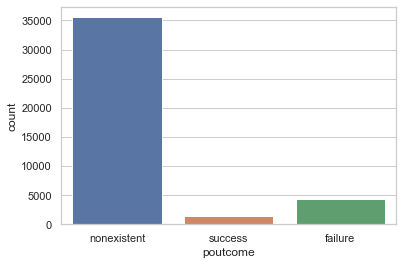

In [12]:
#Barplot for previous marketing loan outcome
sns.countplot(x="poutcome", data=data)
plt.show()

In [13]:
#Dropping the redant columns

data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [14]:
#Creating Dummy Variables

data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [15]:
#Drop the unknown columns

data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

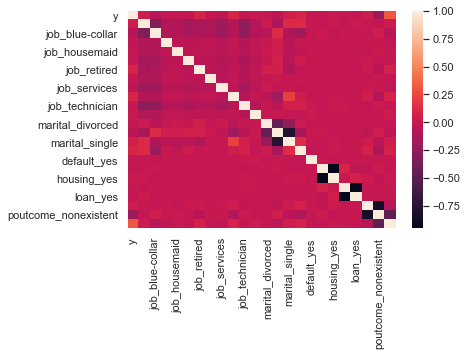

In [16]:
#Check the independence between the independent variables

sns.heatmap(data2.corr())
plt.show()

In [17]:
# Split the data into training and test sets

X = data2.iloc[:,1:]
print(X)
y = data2.iloc[:,0]
print(y)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                1                 0              0   
1               0                0                 0              0   
2               0                0                 0              0   
3               0                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
41183           0                0                 0              0   
41184           0                0                 0              1   
41185           1                0                 0              0   
41186           0                0                 0              0   
41187           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
10685           0                0                 1              0   
224             0                0                 0              0   
29638           0                1                 0              0   
4804            1                0                 0              0   
11614           0                0                 0              1   
...           ...              ...               ...            ...   
20757           0                1                 0              0   
32103           0                1                 0              0   
30403           0                0                 0              0   
21243           0                1                 0              0   
2732            0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
10685               0            0                  0             0   
224  

In [19]:
X_train.shape

(30891, 23)

In [20]:
columns = X_train.columns
print (columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


### SMOTE - Synthetic Minority Oversampling Technique for solveing the problem of Imbalanced Data

In [21]:
#Works by creating synthetic samples from the minor class (subscription) instead of creating copies.
#Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


data_new=pd.get_dummies(data_org, columns =['job','marital','default','housing','loan','poutcome'])
data_new.columns.values


X = data_new.loc[:, data_new.columns != 'y']
print(X)
y = data_new.loc[:, data_new.columns == 'y']
print(y)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                1                 0              0   
1               0                0                 0              0   
2               0                0                 0              0   
3               0                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
41183           0                0                 0              0   
41184           0                0                 0              1   
41185           1                0                 0              0   
41186           0                0                 0              0   
41187           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [22]:
X = data2.loc[:, data2.columns != 'y']
print(X)
y = data2.loc[:, data2.columns == 'y']
print(y)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                1                 0              0   
1               0                0                 0              0   
2               0                0                 0              0   
3               0                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
41183           0                0                 0              0   
41184           0                0                 0              1   
41185           1                0                 0              0   
41186           0                0                 0              0   
41187           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [23]:
#from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
31880           0                0                 0              0   
38177           1                0                 0              0   
2459            0                0                 0              0   
756             0                1                 0              0   
11275           1                0                 0              0   
...           ...              ...               ...            ...   
20757           0                1                 0              0   
32103           0                1                 0              0   
30403           0                0                 0              0   
21243           0                1                 0              0   
2732            0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
31880               0            0                  0             0   
38177

In [24]:
columns = X_train.columns
print(columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [25]:
#On Train Data

import numpy as np
os_data_X,os_data_y=os.fit_resample(X_train, np.ravel(y_train))

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
print(os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
print(os_data_y)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              0   
1               1                0                 0              0   
2               0                0                 0              0   
3               0                1                 0              0   
4               1                0                 0              0   
...           ...              ...               ...            ...   
51129           0                0                 0              1   
51130           0                0                 0              0   
51131           0                0                 0              0   
51132           0                0                 0              0   
51133           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [26]:
#On Test Data

os_data_test_X,os_data_test_y=os.fit_resample(X_test,np.ravel( y_test))

os_data_test_X = pd.DataFrame(data=os_data_test_X,columns=columns )
print(os_data_test_X)
os_data_test_y= pd.DataFrame(data=os_data_test_y,columns=['y'])
print(os_data_test_y)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                1                 0              0   
1               0                0                 0              0   
2               0                1                 0              0   
3               1                0                 0              0   
4               0                0                 0              1   
...           ...              ...               ...            ...   
21957           1                0                 0              0   
21958           1                0                 0              0   
21959           1                0                 0              0   
21960           1                0                 0              0   
21961           1                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [27]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [28]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X))
print("Number of no subscription in original data",len(y[y['y']==0]))
print("Number of subscription",len(y[y['y']==1]))
print("Proportion of no subscription data in original data is ",len(y[y['y']==0])/len(X))
print("Proportion of subscription data in original data is ",len(y[y['y']==1])/len(X))

length of oversampled data is  41188
Number of no subscription in original data 36548
Number of subscription 4640
Proportion of no subscription data in original data is  0.8873458288821987
Proportion of subscription data in original data is  0.11265417111780131


#### On the basis of above process we can say that we have balanced data.

### RFE - Recursive Feature Elimination for selecting Important Variables

we are using RFE is to select features by recursively considering smaller and smaller sets of features. its works as a  repeatitive constructing modeal then its choose either the best or worst performing feature then repeating the process agian & again with the rest of the features. this process work till all the feature will worn out.

In [29]:
data_final_vars=data2.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
len(rfe.ranking_)
print(rfe.ranking_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True False  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 3 1 1 1 2 1]


In [30]:
# Fitting the Logit Model

X=os_data_X
print(X)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              0   
1               1                0                 0              0   
2               0                0                 0              0   
3               0                1                 0              0   
4               1                0                 0              0   
...           ...              ...               ...            ...   
51129           0                0                 0              1   
51130           0                0                 0              0   
51131           0                0                 0              0   
51132           0                0                 0              0   
51133           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [31]:
y=os_data_y['y']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
51129    1
51130    1
51131    1
51132    1
51133    1
Name: y, Length: 51134, dtype: int64


In [32]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.605567
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.126     
Dependent Variable:   y                 AIC:               61976.1187
Date:                 2021-08-24 14:10  BIC:               62179.4894
No. Observations:     51134             Log-Likelihood:    -30965.   
Df Model:             22                LL-Null:           -35443.   
Df Residuals:         51111             LLR p-value:       0.0000    
Converged:            0.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
job_admin.            0.3619   0.0240  15.0571 0.0000  0.3148  0.4090
job_blue-collar       0.0171   0.0053   3.2332 0.0012 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
# Fitting the Logistic Model

#Without SMOTE
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(X_test)
print(y_pred)
y_pred_train = classifier.predict(X_train)
print(y_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [35]:
# Evaluating the Logistic Model Without SMOTE

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[10850   131]
 [ 1104   272]]
Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.67      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [36]:
# Evaluating the Logistic Model With SMOTE

classifier_SM = LogisticRegression(random_state=0)
classifier_SM.fit(X, y)

y_pred_SM = classifier_SM.predict(os_data_test_X)
print(y_pred_SM)
y_pred_train_SM = classifier_SM.predict(X)
print(y_pred_train_SM)

[0 1 0 ... 1 0 1]
[1 0 0 ... 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix_SM = confusion_matrix(os_data_test_y, y_pred_SM)

print(confusion_matrix_SM)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


from sklearn.metrics import classification_report
print(classification_report(os_data_test_y, y_pred_SM))

[[9151 1830]
 [5569 5412]]
Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.62      0.83      0.71     10981
           1       0.75      0.49      0.59     10981

    accuracy                           0.66     21962
   macro avg       0.68      0.66      0.65     21962
weighted avg       0.68      0.66      0.65     21962

